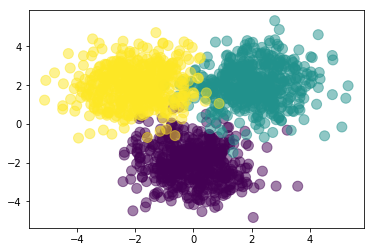

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nclass = 500
D = 2
M = 3
K = 3

#creating 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [3]:
N = len(Y)

T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

In [8]:
import tensorflow as tf

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

py_x = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=tfY))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x, 1)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 10 == 0:
        print(np.mean(Y == pred))

0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.336
0.348666666667
0.390666666667
0.434
0.496666666667
0.546
0.582666666667
0.608666666667
0.625333333333
0.637333333333
0.643333333333
0.648666666667
0.653333333333
0.654
0.654666666667
0.657333333333
0.657333333333
0.656666666667
0.656
0.657333333333
0.657333333333
0.657333333333
0.657333333333
0.658
0.658
0.658
0.660666666667
0.668
0.679333333333
0.691333333333
0.698
0.713333333333
0.722666666667
0.734
0.744
0.758666666667
0.768666666667
0.781333333333
0.796666666667
0.808666666667
0.821333333333
0.831333333333
0.850666666667
0.860666666667
0.867333333333
0.874666666667
0.886666666667
0.896666666667
0.905333333333
0.913333333333
0.924
0.933333333333
0.942
0.947333333333
0.950666666667
0.956666666667
0.958
0.962666666667
0.964666666667
0.965333333333
0.965333333333
0.966666666667
0.967333333333
0.968666666667
0.96866666